In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [86]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [87]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [88]:
X = pd.DataFrame(diabetes['data'],columns=['age', 'gender', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
y = diabetes['target']

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=17)

In [90]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeRegressor()
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,10,15,20,25], 
    'max_features':['auto', 'sqrt', 'log2'],
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeRegressor(),param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Vivek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [91]:
grid.best_score_,grid.best_params_

(np.float64(-3848.679964986116),
 {'criterion': 'friedman_mse',
  'max_depth': 4,
  'max_features': 'sqrt',
  'splitter': 'best'})

In [92]:
y_pred = grid.predict(X_test)

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.34757151653697127
48.458106999161345
3712.546525991216


In [96]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth= 4, max_features='sqrt', splitter='best')
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='sqrt')

[Text(0.5431034482758621, 0.9, 'x[7] <= 0.02\nfriedman_mse = 6025.709\nsamples = 309\nvalue = 150.654'),
 Text(0.27586206896551724, 0.7, 'x[3] <= 0.044\nfriedman_mse = 5056.906\nsamples = 206\nvalue = 128.563'),
 Text(0.40948275862068967, 0.8, 'True  '),
 Text(0.13793103448275862, 0.5, 'x[7] <= -0.009\nfriedman_mse = 3670.195\nsamples = 175\nvalue = 115.594'),
 Text(0.06896551724137931, 0.3, 'x[0] <= -0.091\nfriedman_mse = 2834.97\nsamples = 114\nvalue = 105.061'),
 Text(0.034482758620689655, 0.1, 'friedman_mse = 4151.521\nsamples = 11\nvalue = 140.455'),
 Text(0.10344827586206896, 0.1, 'friedman_mse = 2546.299\nsamples = 103\nvalue = 101.282'),
 Text(0.20689655172413793, 0.3, 'x[2] <= -0.009\nfriedman_mse = 4636.299\nsamples = 61\nvalue = 135.279'),
 Text(0.1724137931034483, 0.1, 'friedman_mse = 2397.124\nsamples = 31\nvalue = 101.806'),
 Text(0.2413793103448276, 0.1, 'friedman_mse = 4596.049\nsamples = 30\nvalue = 169.867'),
 Text(0.41379310344827586, 0.5, 'x[8] <= 0.027\nfriedman_ms

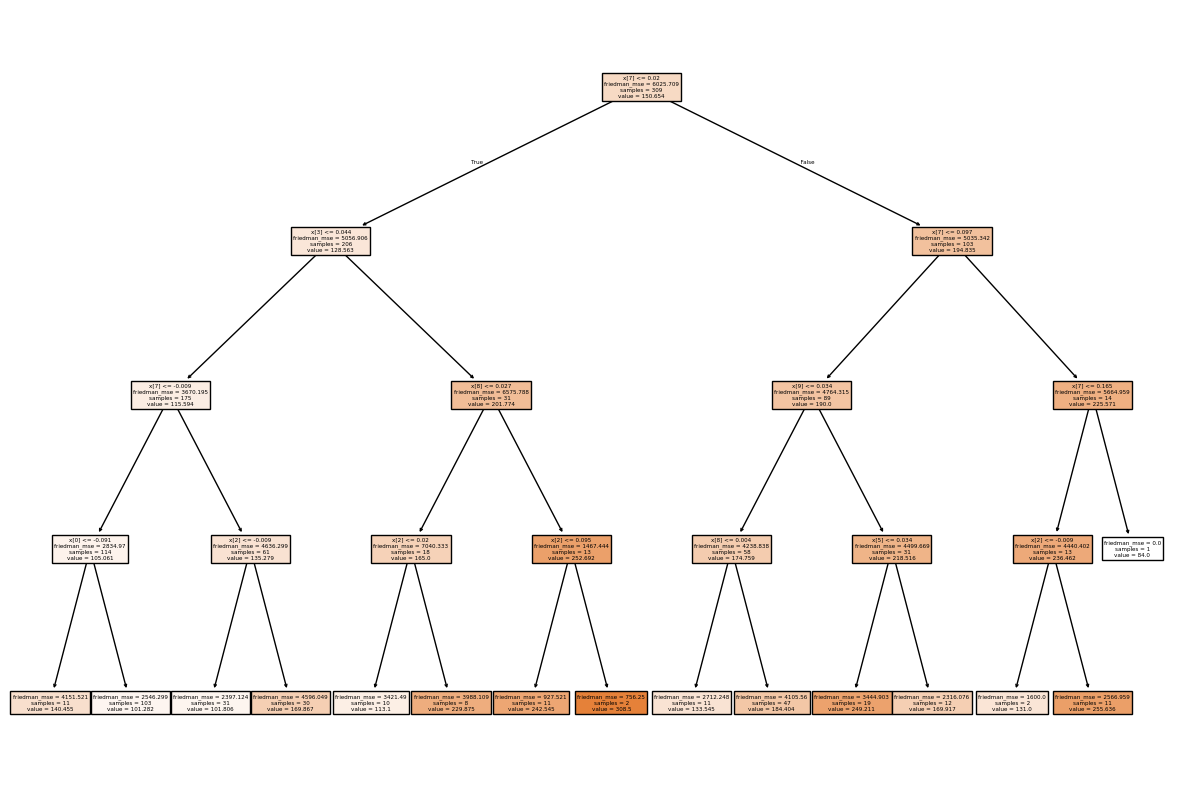

In [97]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtr,filled=True)